# **Proyek Analisis Data: Air Quality Guanyuan**


*   Nama : Muhammad Faqih Hakim
*   Email : mhmdfkih21@gmail.com
*   Dicoding ID :



# **Menentukan Pertanyaan Bisnis**

*   Bagaimana korelasi antara arah angin, kecepatan angin, dan konsentrasi polutan?

*   Bagaimana curah hujan mempengaruhi kadar polutan, terutama PM2.5 dan PM10?

*   Kapan Puncak Konsentreasi PM2.5, PM10, NO2, SO2, CO tertinggi dalam satu Hari?

*   Bagaimana PM2.5, PM10, NO2, SO2, dan CO mempengaruhi O3

#  **Import Library Yang Digunakan**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Wragling**

**Gathering data**

In [37]:
guanyuan_df = pd.read_csv('https://raw.githubusercontent.com/Fqih/AnalisisData/main/dashboard/all_data.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,CO/10
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Musim Gugur,30.0
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Musim Gugur,30.0
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Musim Gugur,30.0
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Musim Gugur,40.0
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Musim Gugur,40.0


**Assessing Data**

In [3]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
 18  season   35064 non-null  object 
 19  CO/10    35064 non-null  float64
dtypes: float64(12), int64(5), object(3)
memory usage: 

Chek Apakah ada Data yang Null

In [4]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
season     0
CO/10      0
dtype: int64


Cek Data yang Terduplikasi


In [5]:
guanyuan_df.duplicated().sum()

0

In [6]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,CO/10
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.669655,107.909654,17.380181,57.339665,1227.734628,53.995433,13.578570,1011.853281,3.131320,0.067383,1.708293,122.773463
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.774148,91.560222,23.509348,35.054943,1151.132241,57.290628,11.398647,10.404487,13.689356,0.909798,1.203874,115.113224
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,10.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,5.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,50.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,88.000000,8.000000,50.000000,900.000000,39.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,90.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.700000,0.000000,2.200000,150.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,1000.000000


Uraian Proses Assesing data:


1.   Terdapat data yang masih Null yakni, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, DAN WSPM
Pada langkah selanjutnya (cleaning Data) ganti nilai Null menjadi Nilai Yang paling Banyak Muncul


**Cleaning Data**

In [7]:
guanyuan_df["PM2.5"].value_counts()

PM2.5
11.0     1190
12.0      566
10.0      550
14.0      538
9.0       517
         ... 
136.2       1
256.9       1
477.0       1
14.3        1
663.0       1
Name: count, Length: 557, dtype: int64

In [8]:
guanyuan_df.PM10.value_counts()

PM10
18.0     741
14.0     303
25.0     300
20.0     292
24.0     291
        ... 
62.9       1
961.0      1
483.0      1
647.0      1
564.0      1
Name: count, Length: 630, dtype: int64

In [9]:
guanyuan_df.SO2.value_counts()

SO2
2.0000      7823
3.0000      2326
4.0000      1912
5.0000      1683
6.0000      1498
            ... 
92.2488        1
97.3896        1
113.3832       1
100.2456       1
293.0000       1
Name: count, Length: 280, dtype: int64

In [10]:
guanyuan_df.NO2.value_counts()

NO2
28.0000     1150
30.0000      486
21.0000      481
29.0000      473
26.0000      465
            ... 
19.0929        1
22.3777        1
20.9406        1
18.6823        1
208.0000       1
Name: count, Length: 376, dtype: int64

In [11]:
guanyuan_df.CO.value_counts()

CO
400.0     4170
300.0     2341
600.0     2330
500.0     2299
700.0     2218
          ... 
6799.0       1
9600.0       1
4299.0       1
9900.0       1
6299.0       1
Name: count, Length: 117, dtype: int64

In [12]:
guanyuan_df.O3.value_counts()

O3
2.0000      5992
1.0000      1144
3.0000       692
4.0000       564
5.0000       427
            ... 
147.5838       1
171.7884       1
212.4864       1
220.8402       1
415.0000       1
Name: count, Length: 767, dtype: int64

In [13]:
guanyuan_df.TEMP.value_counts()

TEMP
 3.0000     269
 1.0000     240
 2.0000     203
 0.0000     196
-1.0000     186
           ... 
 10.4750      1
 11.8125      1
 10.2600      1
 9.2750       1
-0.6250       1
Name: count, Length: 967, dtype: int64

In [14]:
guanyuan_df.PRES.value_counts()

PRES
1023.00    276
1019.00    252
1024.00    249
1025.00    248
1020.00    239
          ... 
1036.40      1
1038.30      1
1039.80      1
1040.90      1
1034.25      1
Name: count, Length: 600, dtype: int64

In [15]:
guanyuan_df.DEWP.value_counts()

DEWP
 17.6    163
 17.0    133
 17.2    129
 18.8    128
 17.8    126
        ... 
-31.4      1
-31.1      1
-30.8      1
-28.7      1
-28.9      1
Name: count, Length: 604, dtype: int64

In [16]:
guanyuan_df.RAIN.value_counts()

RAIN
0.0     33684
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
12.9        1
13.6        1
4.2         1
5.0         1
5.1         1
Name: count, Length: 127, dtype: int64

In [17]:
guanyuan_df.wd.value_counts()

wd
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [18]:
guanyuan_df.WSPM.value_counts()

WSPM
1.2    1905
1.1    1842
1.0    1747
1.3    1640
0.9    1604
       ... 
8.5       1
9.2       1
8.8       1
8.9       1
8.6       1
Name: count, Length: 91, dtype: int64

In [19]:
guanyuan_df.station.value_counts()

station
Guanyuan    35064
Name: count, dtype: int64

NILAI TERBANYAK NYA ANTARA LAIN:
* PM2.5 = 11.0  
* PM10 = 18.0
* SO2 = 2.0000      
* NO2 = 28.0000
* CO = 400.0
* O3 = 2.0000   
* TEMP = 3.0000
* PRES = 1023.00
* DEWP = 17.6
* RAIN = 0.0
* wd = NE
* WSPM = 1.2



In [20]:
guanyuan_df["PM2.5"].fillna(value=11, inplace=True)
guanyuan_df.PM10.fillna(value=18, inplace=True)
guanyuan_df.SO2.fillna(value=2, inplace=True)
guanyuan_df.NO2.fillna(value=28, inplace=True)
guanyuan_df.CO.fillna(value=400, inplace=True)
guanyuan_df.O3.fillna(value=2, inplace=True)
guanyuan_df.TEMP.fillna(value=3, inplace=True)
guanyuan_df.PRES.fillna(value=1023, inplace=True)
guanyuan_df.DEWP.fillna(value=17.6, inplace=True)
guanyuan_df.RAIN.fillna(value=0, inplace=True)
guanyuan_df.wd.fillna(value="NE", inplace=True)
guanyuan_df.WSPM.fillna(value=1.2, inplace=True)

In [21]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
season     0
CO/10      0
dtype: int64

Data sudah di Cleaning selanjutnya tinggal kita explore

# **Exploratory Data Analysis (EDA)**

**Explore**

In [22]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,CO/10
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.669655,107.909654,17.380181,57.339665,1227.734628,53.995433,13.578570,1011.853281,3.131320,0.067383,1.708293,122.773463
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.774148,91.560222,23.509348,35.054943,1151.132241,57.290628,11.398647,10.404487,13.689356,0.909798,1.203874,115.113224
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,10.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,5.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,50.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,88.000000,8.000000,50.000000,900.000000,39.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,90.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.700000,0.000000,2.200000,150.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,1000.000000


Buat kolom baru date

In [23]:
guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])
guanyuan_df.set_index('date', inplace=True)

Buat kolom Musim dengan mempecah 12 bulan yang ada menjadi 4 musim

In [24]:
guanyuan_df['season'] = (guanyuan_df['month'] % 12 // 3) + 1
season_mapping = {
    1: 'Musim Dingin',
    2: 'Musim Gugur',
    3: 'Musim Panas',
    4: 'Musim Semi'
}
guanyuan_df.season = guanyuan_df.season.map(season_mapping)
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,CO/10
date,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Musim Gugur,30.0
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Musim Gugur,30.0
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Musim Gugur,30.0
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Musim Gugur,40.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Musim Gugur,40.0


Karena Nilai CO tinggi, agar nanti dapat di bandingkan maka ubah nilai CO dengan membaginya dengan 10

In [25]:
guanyuan_df['CO/10'] = guanyuan_df['CO'] / 10

In [26]:
guanyuan_df.season.value_counts()

season
Musim Gugur     8832
Musim Panas     8832
Musim Semi      8736
Musim Dingin    8664
Name: count, dtype: int64

In [27]:
guanyuan_df.groupby(by="season").CO.nunique().sort_values(ascending=False)

season
Musim Dingin    99
Musim Semi      79
Musim Gugur     78
Musim Panas     54
Name: CO, dtype: int64

## Visualization & Explanatory Analysis

#  **Bagaimana korelasi antara kecepatan angin, dan konsentrasi polutan?**



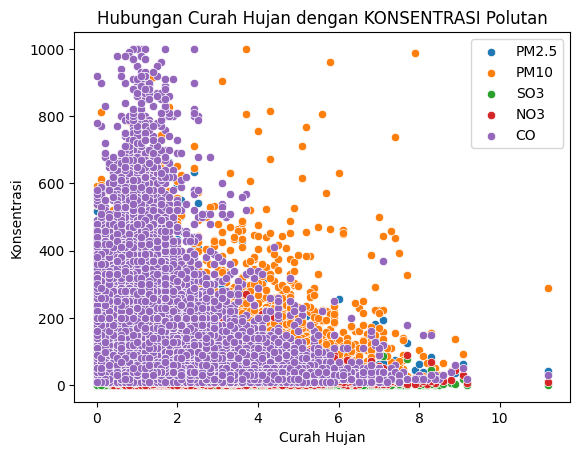

In [30]:
sns.scatterplot(x='WSPM', y='PM2.5', data=guanyuan_df, label='PM2.5')
sns.scatterplot(x='WSPM', y='PM10', data=guanyuan_df, label='PM10')
sns.scatterplot(x='WSPM', y='SO2', data=guanyuan_df, label='SO3')
sns.scatterplot(x='WSPM', y='NO2', data=guanyuan_df, label='NO3')
sns.scatterplot(x='WSPM', y='CO/10', data=guanyuan_df, label='CO')
plt.title('Hubungan Curah Hujan dengan KONSENTRASI Polutan')
plt.xlabel('Curah Hujan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

# **Bagaimana curah hujan mempengaruhi kadar polutan**

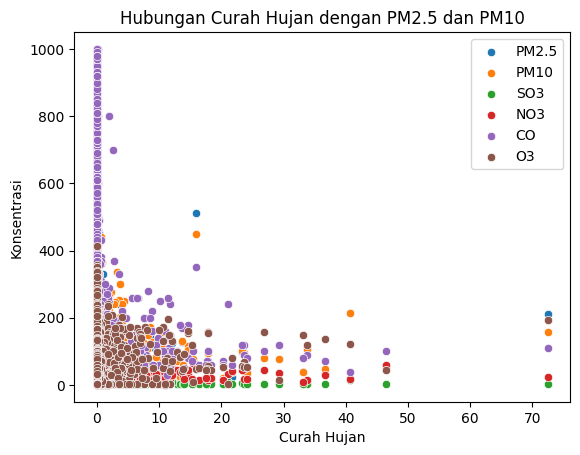

In [31]:
sns.scatterplot(x='RAIN', y='PM2.5', data=guanyuan_df, label='PM2.5')
sns.scatterplot(x='RAIN', y='PM10', data=guanyuan_df, label='PM10')
sns.scatterplot(x='RAIN', y='SO2', data=guanyuan_df, label='SO3')
sns.scatterplot(x='RAIN', y='NO2', data=guanyuan_df, label='NO3')
sns.scatterplot(x='RAIN', y='CO/10', data=guanyuan_df, label='CO')
sns.scatterplot(x='RAIN', y='O3', data=guanyuan_df, label='O3')
plt.title('Hubungan Curah Hujan dengan PM2.5 dan PM10')
plt.xlabel('Curah Hujan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

# **Kapan Puncak Konsentreasi PM2.5, PM10, NO2, SO2, CO tertinggi dalam satu Hari?**

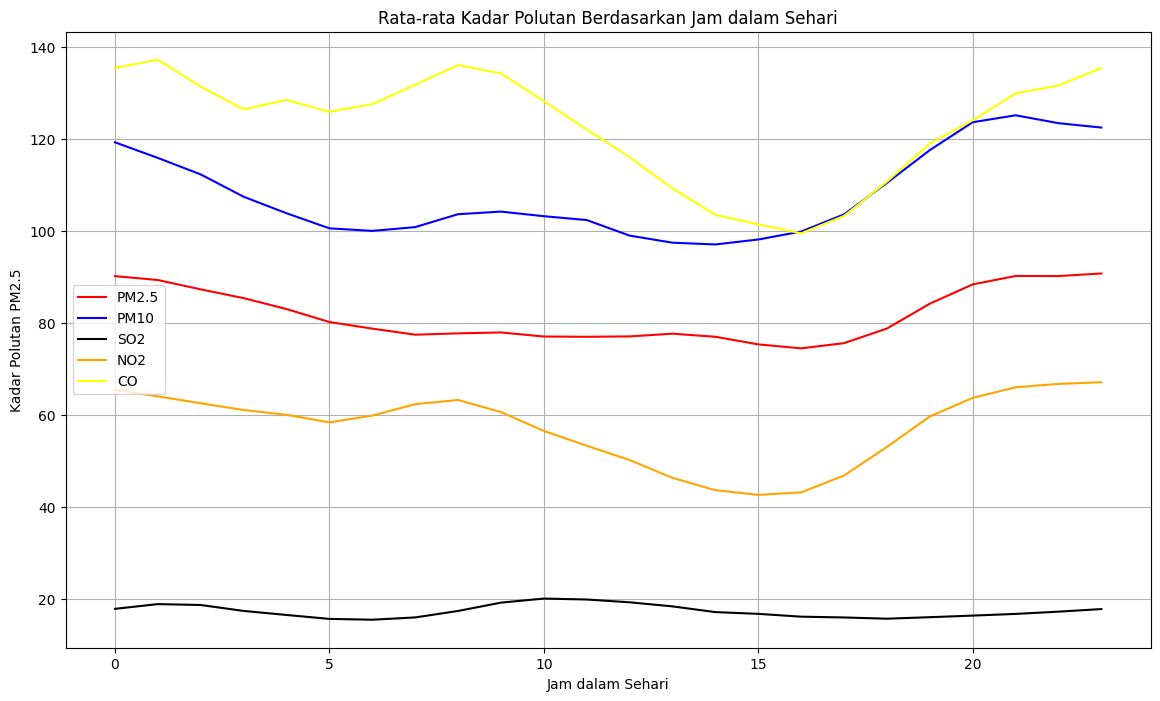

In [32]:
plt.figure(figsize=(14, 8))
guanyuan_df.groupby('hour')['PM2.5'].mean().plot(kind='line', color='red', label='PM2.5')
guanyuan_df.groupby('hour')['PM10'].mean().plot(kind='line', color='blue', label='PM10')
guanyuan_df.groupby('hour')['SO2'].mean().plot(kind='line', color='black', label='SO2')
guanyuan_df.groupby('hour')['NO2'].mean().plot(kind='line', color='orange', label='NO2')
guanyuan_df.groupby('hour')['CO/10'].mean().plot(kind='line', color='yellow', label='CO')
plt.title('Rata-rata Kadar Polutan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Kadar Polutan PM2.5')
plt.legend()
plt.grid(True)
plt.show()

# **Bagaimana PM2.5, PM10, NO2, SO2, dan CO mempengaruhi O3**

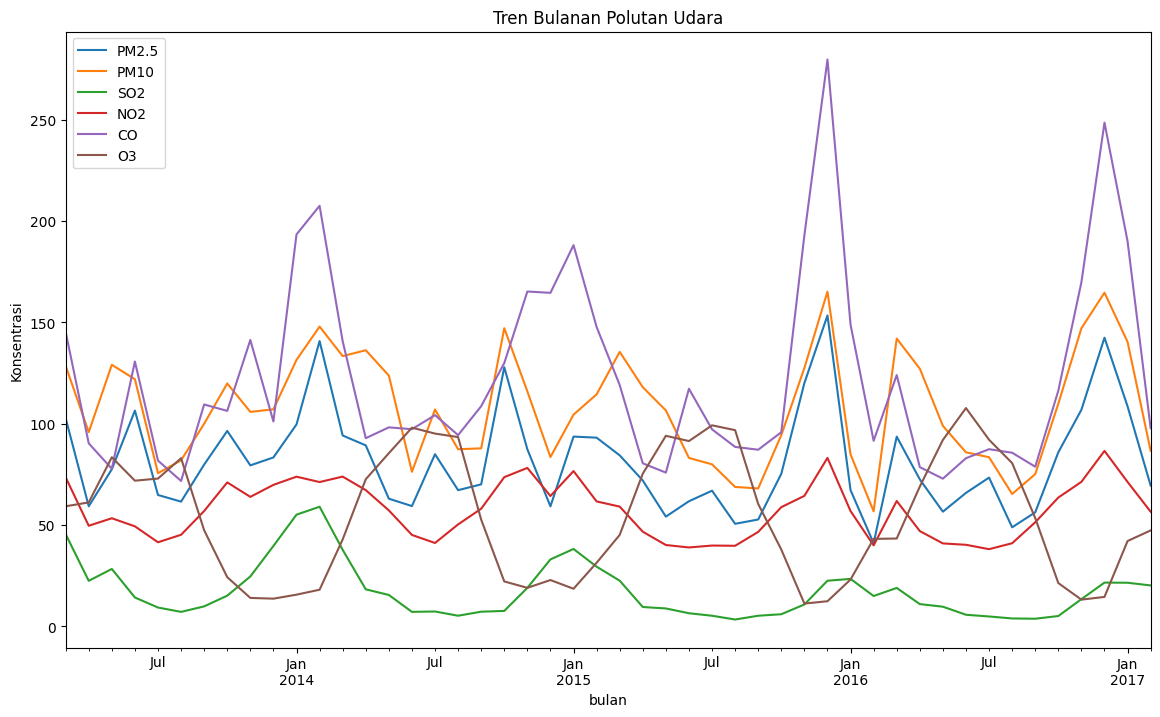

In [33]:
plt.figure(figsize=(14, 8))
guanyuan_df['PM2.5'].resample('M').mean().plot(label='PM2.5')
guanyuan_df['PM10'].resample('M').mean().plot(label='PM10')
guanyuan_df['SO2'].resample('M').mean().plot(label='SO2')
guanyuan_df['NO2'].resample('M').mean().plot(label='NO2')
guanyuan_df['CO/10'].resample('M').mean().plot(label='CO')
guanyuan_df['O3'].resample('M').mean().plot(label='O3')
plt.title('Tren Bulanan Polutan Udara')
plt.xlabel('bulan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

## Conclusion

1.   Bagaimana korelasi antara arah angin, kecepatan angin, dan konsentrasi polutan?

>dapat disimpulkan bahwahubungan antara kecepatan angin dan konsentrasi polutan yang berbanding terbalik, saat kecepatan angin meningkat konsentrasi polutan akan semakin rendah karena terbawa dan terpecah oleh angin yang ada.



2.  Bagaimana curah hujan mempengaruhi kadar polutan, terutama PM2.5 dan PM10?

> Sama seperti Kacepatan angin sebelumnya, curah hujan juga sangat mempengaruhi konsentrasi dari polutan yang ada semakin tinggi curah hujan maka konsentrasi polusi di udara akan semakin menipis.



3.   Kapan Puncak Konsentreasi PM2.5, PM10, NO2, SO2, CO tertinggi dalam satu Hari?


> Puncaknya ada pada jam 15:00 sampai 23:00 yang merupakan jam pulang kerja dimana banyak sekali aktifitas yang ada. dan juga ada peningkatan  dari jam 5:00 sampai jam 10:00 yang mana ini juga merupakan jam orang orang memulai aktifitas


4. Bagaimana PM2.5, PM10, NO2, SO2, dan CO mempengaruhi O3


> Dari analisis diatas O3(ozon) Berbanding terbalik dengan polutan yang ada seperti (PM2.5, PM10, NO2, SO2, dan CO) dimana saat kadar polutan meningkat Justru O3 (ozon) Menipis dan sebaliknya




In [34]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,CO/10
date,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Musim Gugur,30.0
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Musim Gugur,30.0
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Musim Gugur,30.0
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Musim Gugur,40.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Musim Gugur,40.0


In [35]:
all_df = guanyuan_df

In [36]:
all_df.to_csv("all_data.csv", index=False)